In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
df = pd.read_csv(r'C:\Users\User\Documents\juputer\telco-churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':  
        df[column] = label_encoder.fit_transform(df[column])

In [5]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### SVM Linear

In [7]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
y_pred_linear = svc_linear.predict(X_test)

In [9]:
print("Kernel: Linear")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_linear))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear))

Kernel: Linear
Confusion Matrix:
[[1386  153]
 [ 259  315]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.67      0.55      0.60       574

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



### SVM Non-Linear

In [10]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)

SVC()

In [11]:
y_pred_rbf = svc_rbf.predict(X_test)

In [12]:
print("\nKernel: RBF")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rbf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf))


Kernel: RBF
Confusion Matrix:
[[1422  117]
 [ 309  265]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1539
           1       0.69      0.46      0.55       574

    accuracy                           0.80      2113
   macro avg       0.76      0.69      0.71      2113
weighted avg       0.79      0.80      0.78      2113



### Linear Regression

In [13]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [14]:
df.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85          2505      0  
1                 0              3           56.95          1466      0  
2                 1              3           53.85           157      1  
3                 0              0           42.30          1400      0  
4                 1              2           70.70           925      1  

[5 rows x 21 columns]

In [15]:
df.describe()

customerID       gender  SeniorCitizen      Partner   Dependents  \
count  7043.000000  7043.000000    7043.000000  7043.000000  7043.000000   
mean   3521.000000     0.504756       0.162147     0.483033     0.299588   
std    2033.283305     0.500013       0.368612     0.499748     0.458110   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%    1760.500000     0.000000       0.000000     0.000000     0.000000   
50%    3521.000000     1.000000       0.000000     0.000000     0.000000   
75%    5281.500000     1.000000       0.000000     1.000000     1.000000   
max    7042.000000     1.000000       1.000000     1.000000     1.000000   

            tenure  PhoneService  MultipleLines  InternetService  \
count  7043.000000   7043.000000    7043.000000      7043.000000   
mean     32.371149      0.903166       0.940508         0.872923   
std      24.559481      0.295752       0.948554         0.737796   
min       0.000000      0.000000       0.000000         0.000000   
25%       9.000000      1.000000       0.000000         0.000000   
50%      29.000000      1.000000       1.000000         1.000000   
75%      55.000000      1.000000       2.000000         1.000000   
max      72.000000      1.000000       2.000000         2.000000   

       OnlineSecurity  ...  DeviceProtection  TechSupport  StreamingTV  \
count     7043.000000  ...       7043.000000  7043.000000  7043.000000   
mean         0.790004  ...          0.904444     0.797104     0.985376   
std          0.859848  ...          0.879949     0.861551     0.885002   
min          0.000000  ...          0.000000     0.000000     0.000000   
25%          0.000000  ...          0.000000     0.000000     0.000000   
50%          1.000000  ...          1.000000     1.000000     1.000000   
75%          2.000000  ...          2.000000     2.000000     2.000000   
max          2.000000  ...          2.000000     2.000000     2.000000   

       StreamingMovies     Contract  PaperlessBilling  PaymentMethod  \
count      7043.000000  7043.000000       7043.000000    7043.000000   
mean          0.992475     0.690473          0.592219       1.574329   
std           0.885091     0.833755          0.491457       1.068104   
min           0.000000     0.000000          0.000000       0.000000   
25%           0.000000     0.000000          0.000000       1.000000   
50%           1.000000     0.000000          1.000000       2.000000   
75%           2.000000     1.000000          1.000000       2.000000   
max           2.000000     2.000000          1.000000       3.000000   

       MonthlyCharges  TotalCharges        Churn  
count     7043.000000   7043.000000  7043.000000  
mean        64.761692   3257.794122     0.265370  
std         30.090047   1888.693496     0.441561  
min         18.250000      0.000000     0.000000  
25%         35.500000   1609.000000     0.000000  
50%         70.350000   3249.000000     0.000000  
75%         89.850000   4901.500000     1.000000  
max        118.750000   6530.000000     1.000000  

[8 rows x 21 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


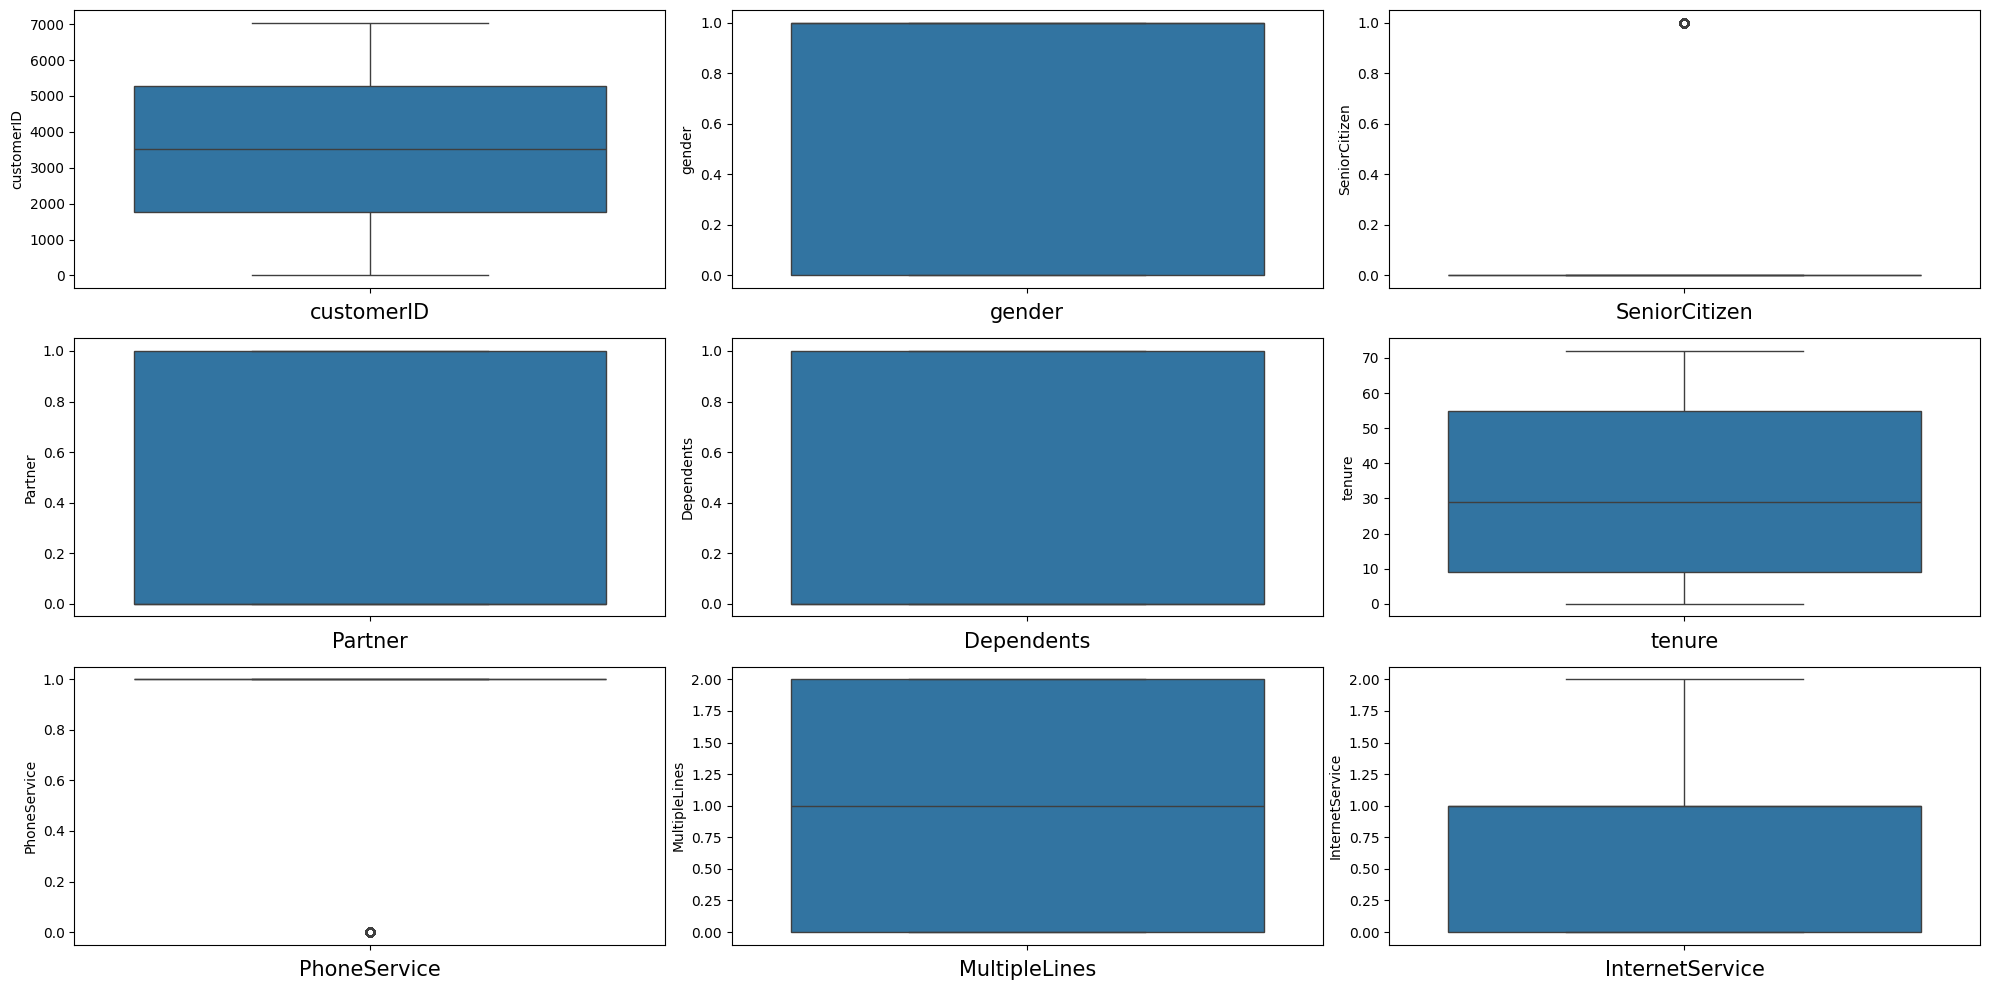

In [17]:
plt.figure(figsize = (20, 10))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

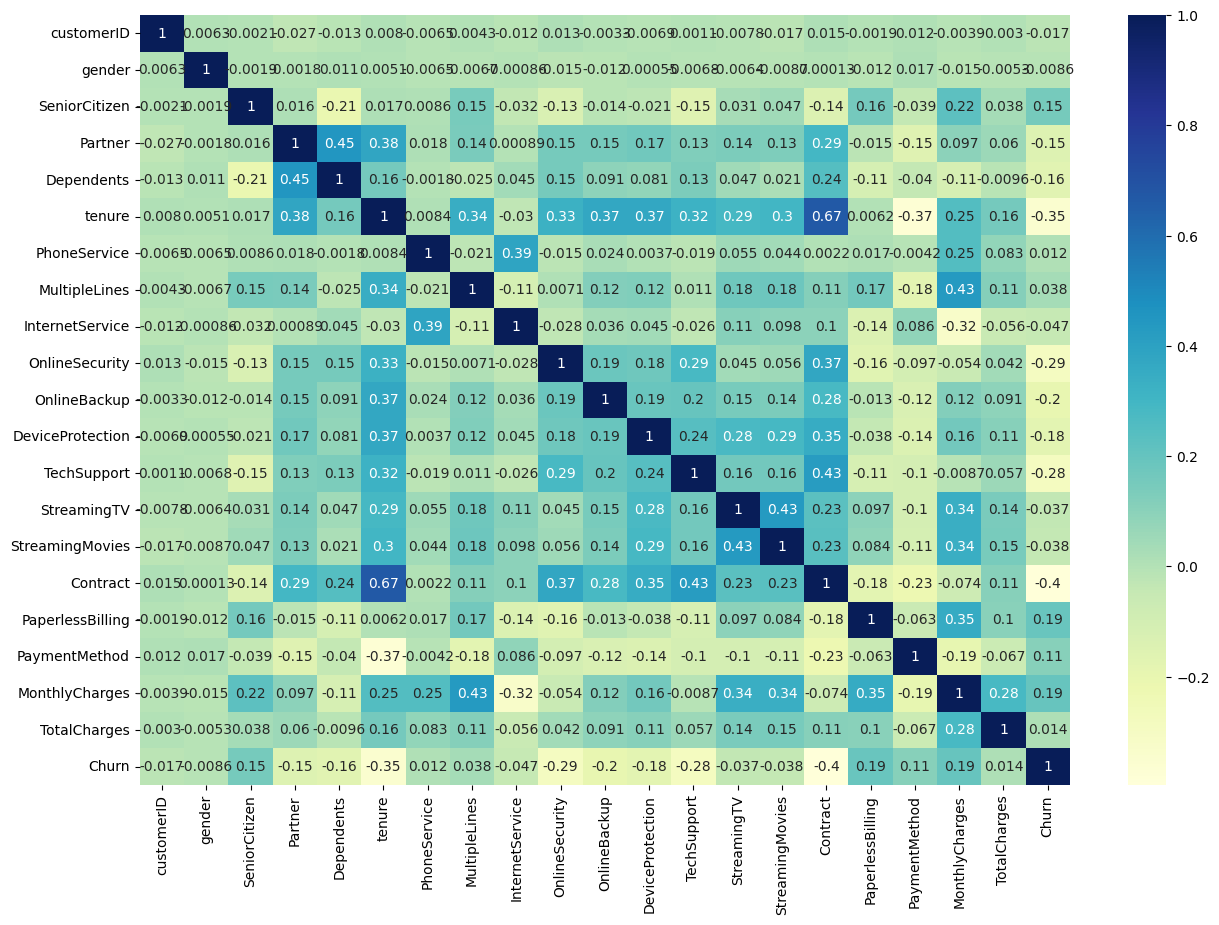

In [18]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [19]:
X = df['customerID']
y = df['Churn']
X

0       5375
1       3962
2       2564
3       5535
4       6511
        ... 
7038    4853
7039    1525
7040    3367
7041    5934
7042    2226
Name: customerID, Length: 7043, dtype: int32

In [20]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [21]:
    X_sm = sm.add_constant(X)
    X_sm

const  customerID
0       1.0        5375
1       1.0        3962
2       1.0        2564
3       1.0        5535
4       1.0        6511
...     ...         ...
7038    1.0        4853
7039    1.0        1525
7040    1.0        3367
7041    1.0        5934
7042    1.0        2226

[7043 rows x 2 columns]

In [22]:
lr = sm.OLS(y, X_sm).fit()
lr.params

const         0.278711
customerID   -0.000004
dtype: float64

In [23]:
y_pred = lr.predict(X_sm)
res = (y - y_pred)
y_pred

0       0.258345
1       0.263699
2       0.268996
3       0.257739
4       0.254041
          ...   
7038    0.260323
7039    0.272933
7040    0.265953
7041    0.256227
7042    0.270277
Length: 7043, dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [26]:
X_train_lm

877     5593
5792    2443
5334    4533
878     5636
6578    2740
        ... 
79      2731
3927    3066
5955    5103
6936    5466
5640    3840
Name: customerID, Length: 4930, dtype: int32

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 300)

In [28]:
X_train

1979    1502
1964    1667
6245    3339
1809    6766
6317    5304
        ... 
5129     419
5834    3567
2965    1093
6625    2371
1233     890
Name: customerID, Length: 4930, dtype: int32

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
X_train = pd.DataFrame(X_train)
y_train = pd.Series(y_train)

In [31]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [32]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

Intercept:  0.2665745946993745
Coefficients:


[(5375, -1.911646092392843e-06)]

In [33]:
X_test = pd.DataFrame(X_test)

y_pred_mlr = mlr.predict(X_test)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [0.25452549 0.26446414 0.26494205 ... 0.25914403 0.26161961 0.26538937]


In [34]:
res = (y_test - y_pred_mlr)
res

1003   -0.254525
1853    0.735536
4602   -0.264942
3188    0.734186
2744   -0.265519
          ...   
1401    0.740789
3987    0.743775
2755   -0.259144
5086    0.738380
4989   -0.265389
Name: Churn, Length: 2113, dtype: float64

In [35]:
X = pd.DataFrame(X)
y = pd.Series(y)

In [36]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
print('R2: {:.2f}'.format(mlr.score(X,y)))
print('RSE:', meanAbErr)

R2: 0.00
RSE: 0.39338212564297265


### Random Forest

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4930, 1)
(4930,)
(2113, 1)
(2113,)


In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
y_pred_rf= mlr.predict(X_test)

In [42]:
y_pred

0       0.258345
1       0.263699
2       0.268996
3       0.257739
4       0.254041
          ...   
7038    0.260323
7039    0.272933
7040    0.265953
7041    0.256227
7042    0.270277
Length: 7043, dtype: float64

In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_train, y_train)

16441795.33204868

In [44]:
prediction = rf.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)

0.2905249881684809


In [45]:
print(rmse)

0.5390036995870073


In [46]:
df.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85          2505      0  
1                 0              3           56.95          1466      0  
2                 1              3           53.85           157      1  
3                 0              0           42.30          1400      0  
4                 1              2           70.70           925      1  

[5 rows x 21 columns]

In [47]:
X = df[['customerID', 'gender','Partner','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, test_size = 0.3, random_state =42)

In [48]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_rase = np.sqrt(mean_squared_error(y_test, rf_pred))

In [49]:
print("Random forest Regression")
print("Rmse:", rf_rase)

Random forest Regression
Rmse: 0.38409592130468706


### Decision Tree

In [50]:
df.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85          2505      0  
1                 0              3           56.95          1466      0  
2                 1              3           53.85           157      1  
3                 0              0           42.30          1400      0  
4                 1              2           70.70           925      1  

[5 rows x 21 columns]

In [51]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':  
        df[column] = label_encoder.fit_transform(df[column])

In [52]:
X = df.drop('Churn', axis=1)  # Asumsi kolom 'Churn' sebagai target
y = df['Churn']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [55]:
y_pred = tree_model.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Akurasi Model: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Akurasi Model: 0.74
Confusion Matrix:
[[1260  279]
 [ 279  295]]


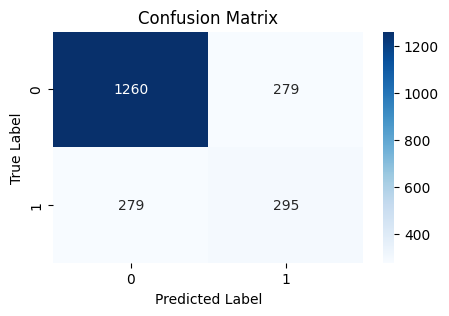

In [57]:
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

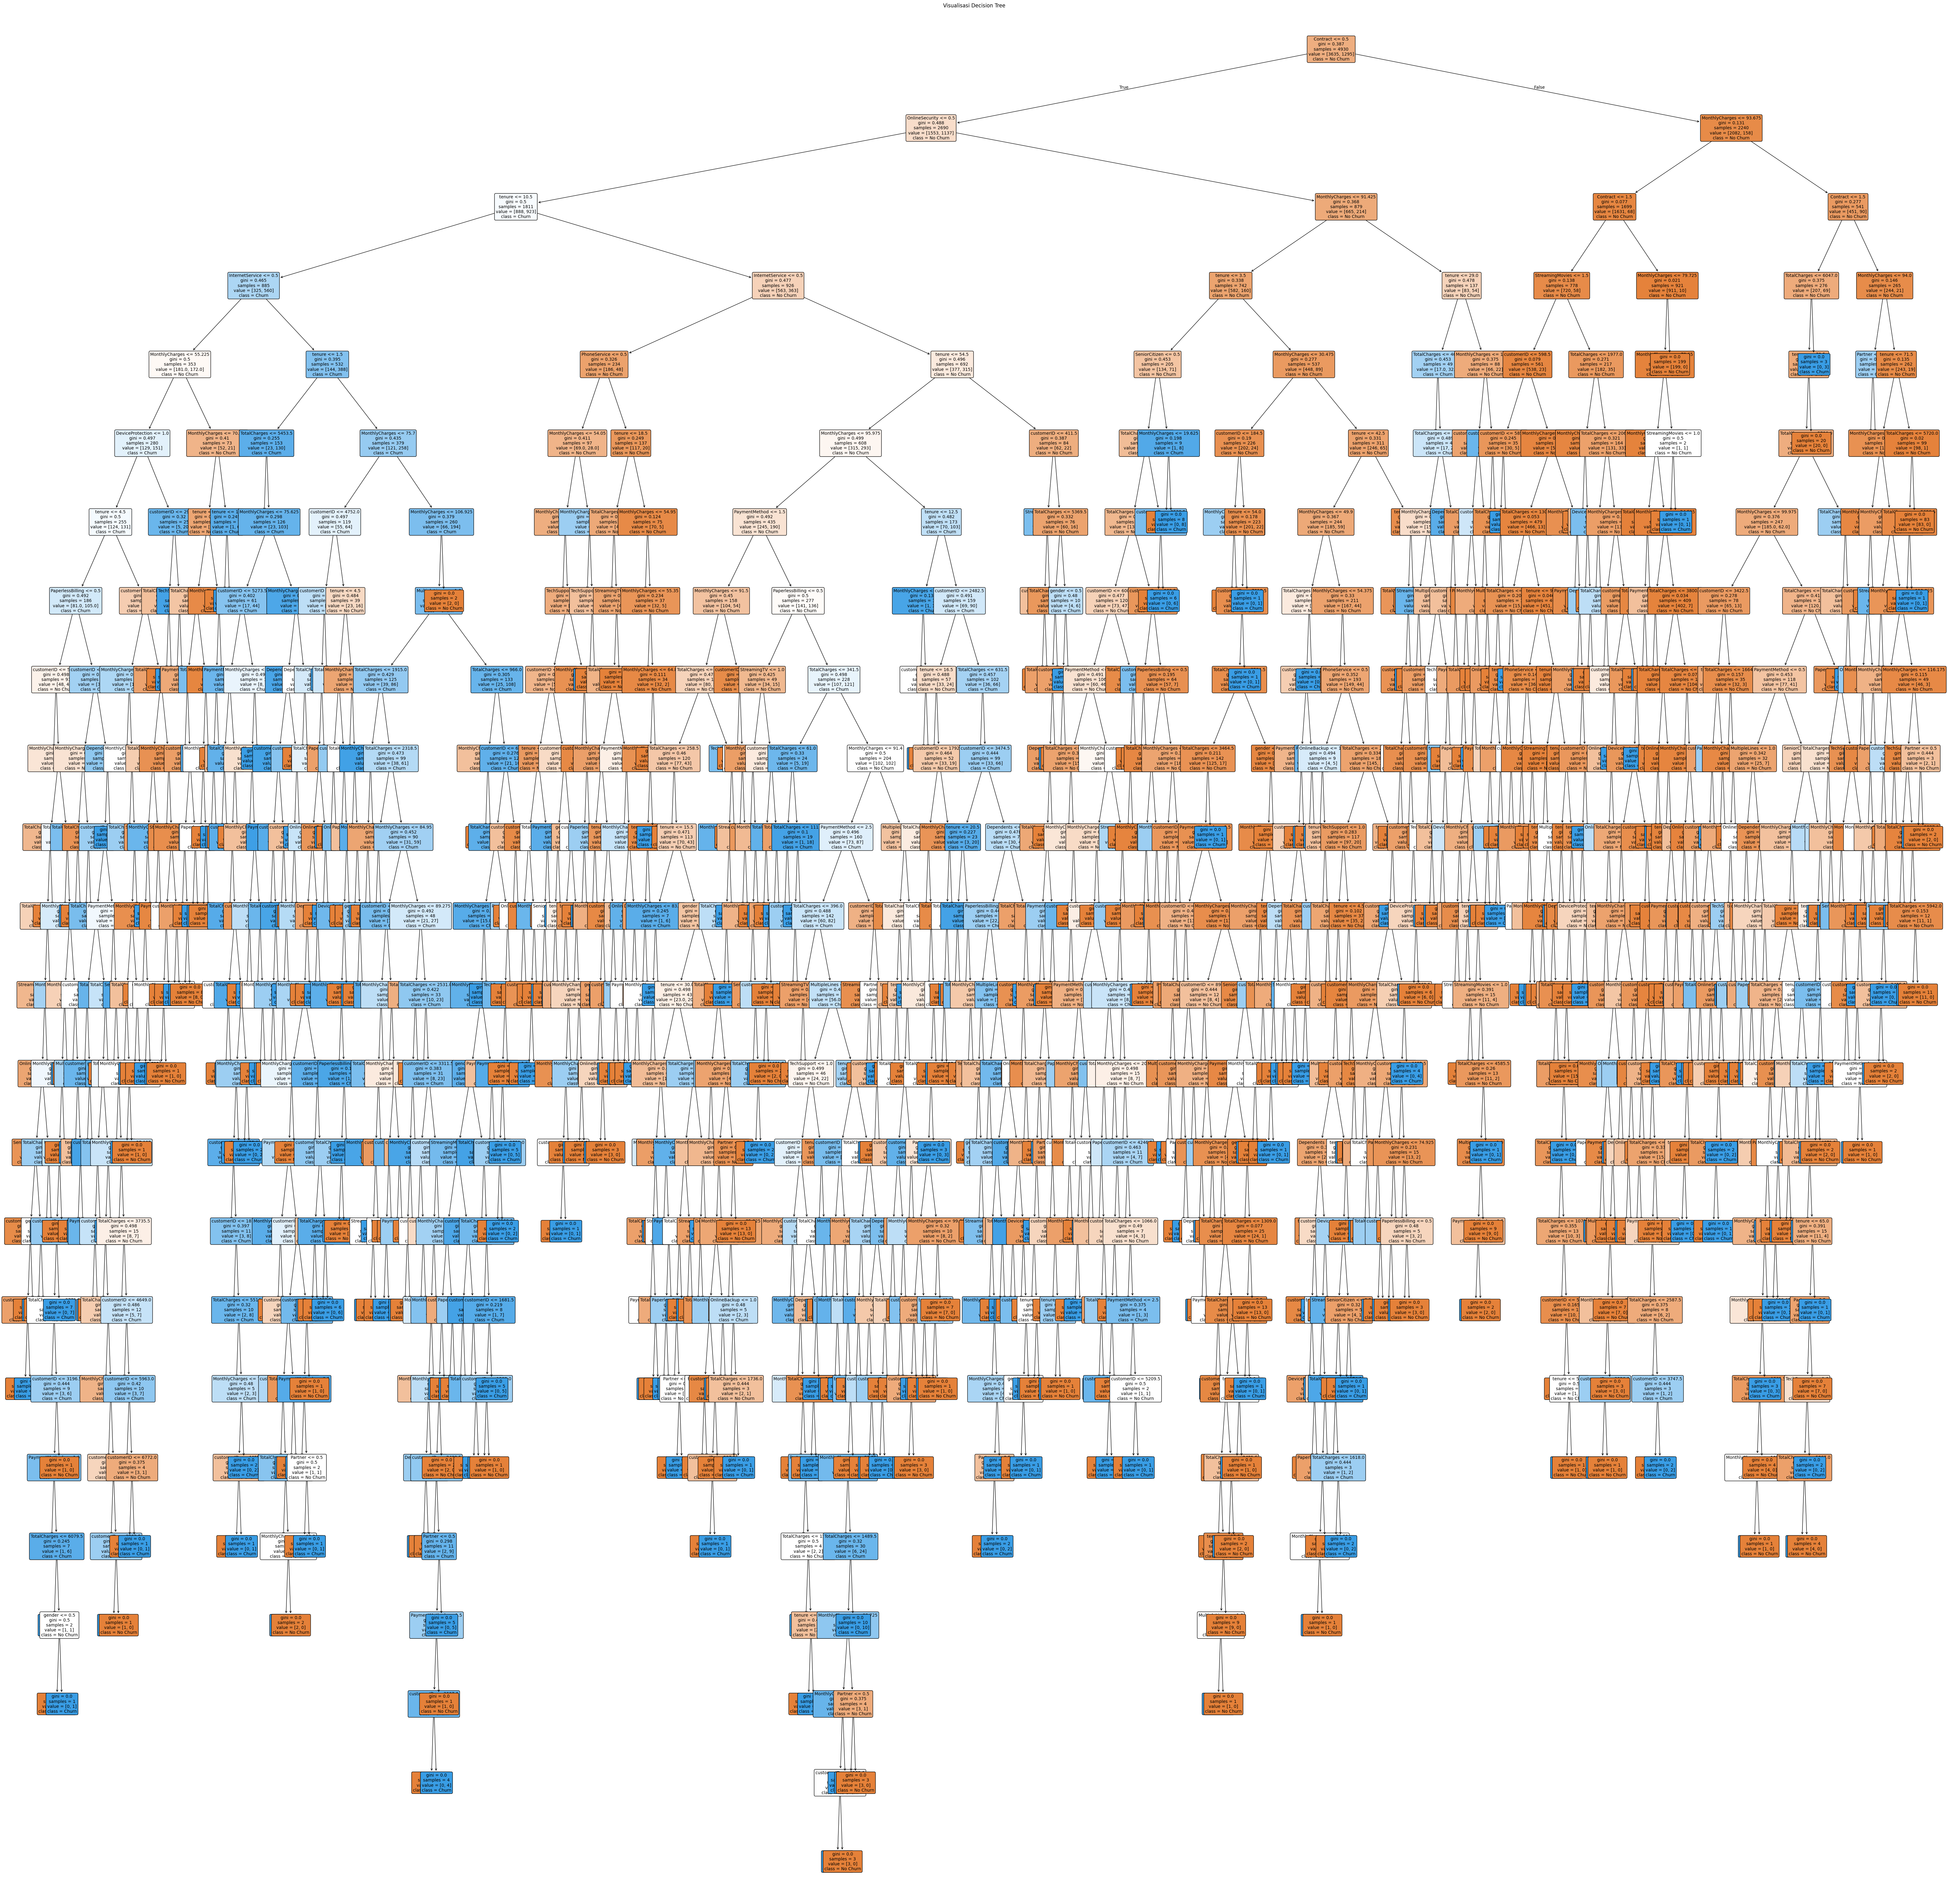

In [58]:
plt.figure(figsize=(80, 80))  # Menyesuaikan ukuran tampilan
plot_tree(
    tree_model,
    feature_names=X.columns,  # Menampilkan nama fitur
    class_names=['No Churn', 'Churn'],  # Menampilkan nama kelas (ubah jika perlu)
    filled=True,  # Mengisi warna berdasarkan kelas
    rounded=True,  # Membuat node bulat
    fontsize=10)
plt.title("Visualisasi Decision Tree")
plt.show()